# Assignment 5

# 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)

In [11]:
# Loading packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures


# Reading in bikeshare data 
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10


day_hour_count = pd.read_csv("bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


In [12]:
# Subsetting data for Friday
friday = day_hour_count[["hour", "friday"]].dropna().copy()

# Separate features and targets
x_friday = friday[['hour']]
y_friday = friday[['friday']] 

# Splitting Friday data
x_fri_train, x_fri_test, y_fri_train, y_fri_test = train_test_split(x_friday, y_friday, test_size=0.2, random_state=42)

# Setting the degree of the polynomial regression
degree = 18

# Polynomial transformation for Friday
poly_fri = PolynomialFeatures(degree=degree)
x_fri_train_poly = poly_fri.fit_transform(x_fri_train)
x_fri_test_poly = poly_fri.transform(x_fri_test)

# Fit the model for Friday
model_fri = linear_model.LinearRegression()
model_fri.fit(x_fri_train_poly, y_fri_train)

# Make predictions for Friday
y_fri_pred = model_fri.predict(x_fri_test_poly)

# Calculate errors for Friday - Testing Set 
mse_fri = metrics.mean_squared_error(y_fri_test, y_fri_pred)
mae_fri = metrics.mean_absolute_error(y_fri_test, y_fri_pred)
mape_fri = metrics.mean_absolute_percentage_error(y_fri_test, y_fri_pred)

print("Friday Testing Errors:")
print("Mean Squared Error (MSE):", mse_fri)
print("Mean Absolute Error (MAE):", mae_fri)
print("Mean Absolute Percentage Error (MAPE):", mape_fri)


Friday Testing Errors:
Mean Squared Error (MSE): 38429.972650807984
Mean Absolute Error (MAE): 133.82982222515145
Mean Absolute Percentage Error (MAPE): 4.436020465899591


In [13]:
# Make predictions for Friday training set
y_fri_train_pred = model_fri.predict(x_fri_train_poly)

# Calculate errors for Friday training set
mse_fri_train = metrics.mean_squared_error(y_fri_train, y_fri_train_pred)
mae_fri_train = metrics.mean_absolute_error(y_fri_train, y_fri_train_pred)
mape_fri_train = metrics.mean_absolute_percentage_error(y_fri_train, y_fri_train_pred)

print("Friday Training Set Errors:")
print("Mean Squared Error (MSE):", mse_fri_train)
print("Mean Absolute Error (MAE):", mae_fri_train)
print("Mean Absolute Percentage Error (MAPE):", mape_fri_train)

Friday Training Set Errors:
Mean Squared Error (MSE): 44125.112503167016
Mean Absolute Error (MAE): 142.312377218177
Mean Absolute Percentage Error (MAPE): 6.264881854443253


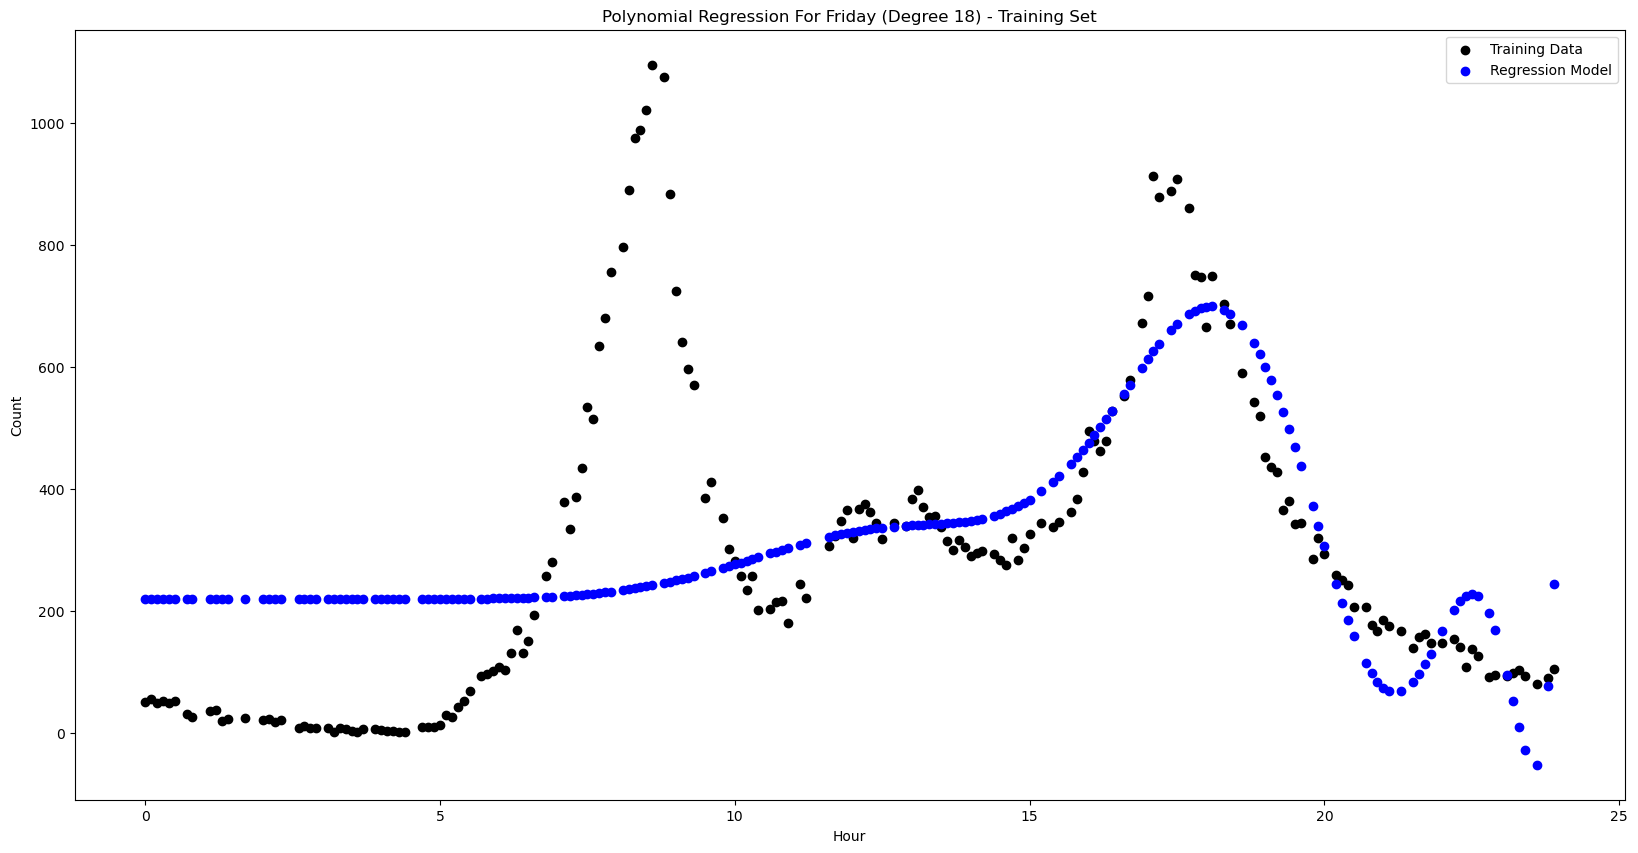

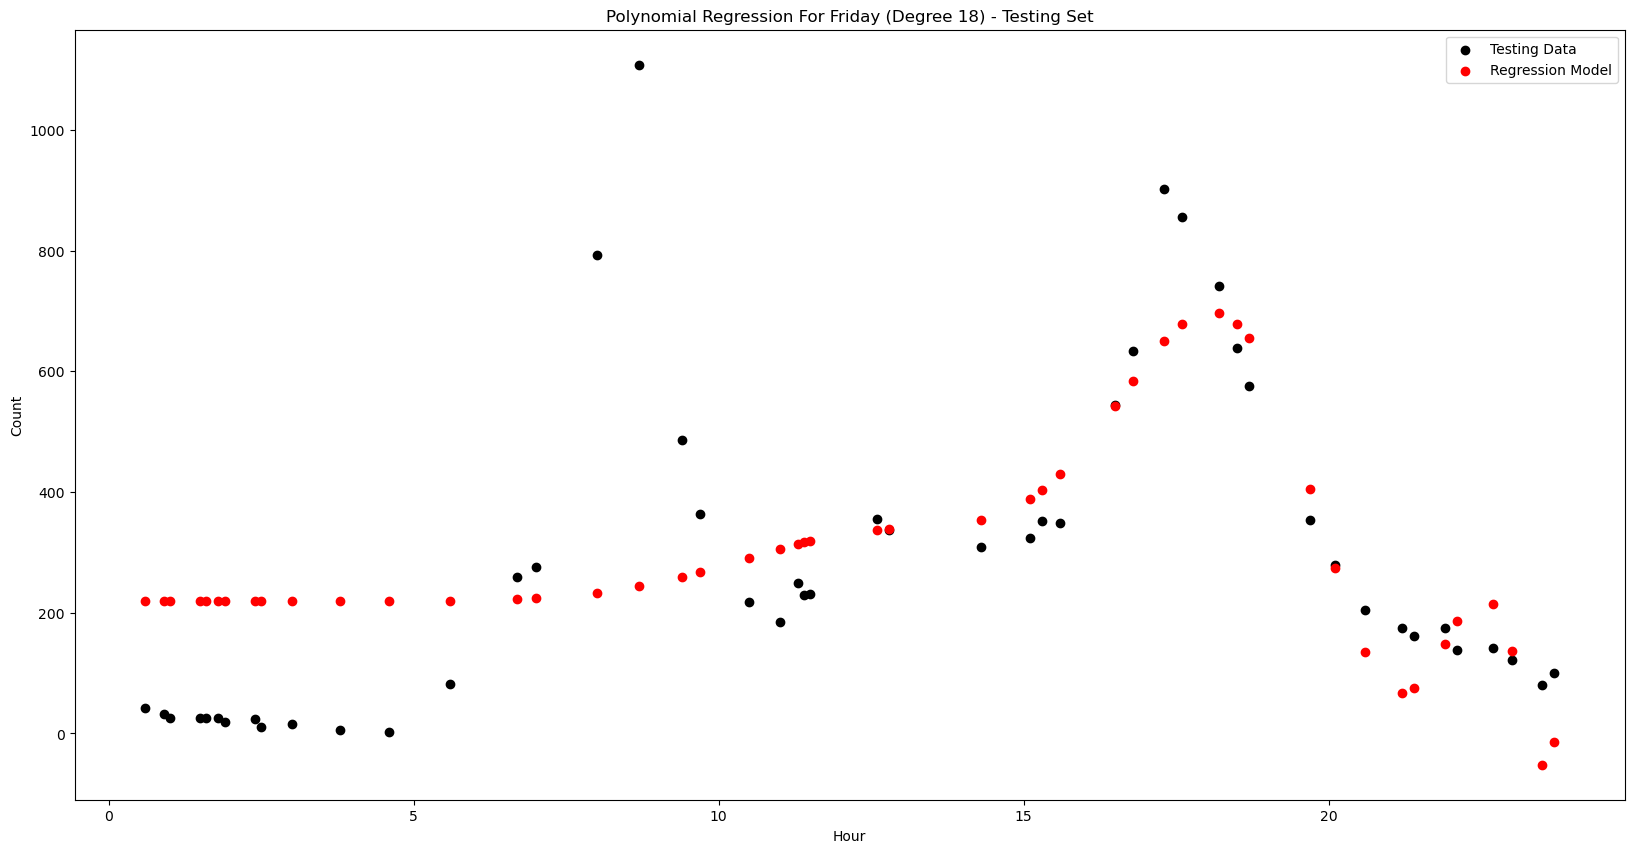

In [14]:
# Plotting the training set
plt.figure(figsize=(20, 10))
plt.scatter(x_fri_train, y_fri_train, color='black', label='Training Data')
plt.scatter(x_fri_train, y_fri_train_pred, color='blue', label='Regression Model')
plt.title('Polynomial Regression For Friday (Degree 18) - Training Set')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting the testing set
plt.figure(figsize=(20, 10))
plt.scatter(x_fri_test, y_fri_test, color='black', label='Testing Data')
plt.scatter(x_fri_test, y_fri_pred, color='red', label='Regression Model')
plt.title('Polynomial Regression For Friday (Degree 18) - Testing Set')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.show()

**Model Interpretation:** The model when applied to both the train and test datasets produced large mean absolute errors and mean squared errors, although surprisingly the test dataset had slightly smaller errors. In looking at the plot of the actual versus predicted points, we see that the model is better at predicting bikeshare rentals later in the day, particularly between the hours of 3 PM and 8 PM. However, from 12 AM to 10 AM, the predicted points are entirely off - completely missing the spike in rentals around 9 AM. 

## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report

In [5]:
# Reading in customer dataset
shop = pd.read_csv("customers.csv")
shop

# Create a dummy variable, spending score > 50 = 1, < or = 50 = 0
shop['score_cat'] = (shop['Spending Score (1-100)'] > 50).astype(int)

# Display the updated dataframe
print(shop.head())

# Identifying non-usable columns
non_numeric_columns = ['Gender', 'Profession', 'CustomerID', 'Spending Score (1-100)']

# Dropping non-numeric columnms & target variable
x = shop.copy().drop(non_numeric_columns + ['score_cat'], axis=1)
y = shop['score_cat']

# Creating training and testing datasets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)


   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  score_cat  
0     Healthcare                1            4          0  
1       Engineer                3            3          1  
2       Engineer                1            1          0  
3         Lawyer                0            2          1  
4  Entertainment                2            6          0  


In [15]:
# Loading packages for decision tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

# Creating decision tree 
model = DecisionTreeClassifier(criterion='entropy')

# Training model
model.fit(x_train, y_train)

# Training Predictions 
train_pred = model.predict(x_train)

# Predictions
test_pred = model.predict(x_test)


In [16]:
# Testing Set - Accuracy, Confusion Matrix, and Classification Report

# Accuracy
accuracy_score(y_test, test_pred)

0.5

In [17]:
# Confusion Matrix 
confusion_matrix(y_test, test_pred)


array([[100, 111],
       [ 89, 100]], dtype=int64)

In [18]:
# Classification Report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50       211
           1       0.47      0.53      0.50       189

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [20]:
 # Checking for feature importance
list(zip(x.columns, model.feature_importances_))

[('Age', 0.2691497239637624),
 ('Annual Income ($)', 0.4217947553863507),
 ('Work Experience', 0.16207003747943047),
 ('Family Size', 0.14698548317045643)]

**Family size has the lowest importance for the model, I propose removing it from the model to see if it improves model performance.**

In [21]:
# Identifying non-usable columns
remove_columns = ['Gender', 'Profession', 'CustomerID', 'Spending Score (1-100)', 'Family Size']

# Dropping non-numeric columnms & target variable
x2= shop.copy().drop(remove_columns + ['score_cat'], axis=1)
y2 = shop['score_cat']

# Creating training and testing datasets 
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=33)

In [22]:
# Training model
model.fit(x2_train, y2_train)

# Training Predictions 
train2_pred = model.predict(x2_train)

# Predictions
test2_pred = model.predict(x2_test)


In [23]:
# Testing Set - Accuracy, Confusion Matrix, and Classification Report

# Accuracy
accuracy_score(y2_test, test2_pred)

0.5325

In [24]:
# Confusion Matrix 
confusion_matrix(y2_test, test2_pred)


array([[114,  97],
       [ 90,  99]], dtype=int64)

In [25]:
# Classification Report
print(classification_report(y2_test, test2_pred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       211
           1       0.51      0.52      0.51       189

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



**Model Interpretation**: In removing the family size feature, the model performance slightly improved, with a 3 percent improvement in accuracy rate (50% to 53%). There were also slight (1-2%) improvements in precision and recall for both levels of levels of the dependent variable (i.e., spending score > 50 or less than or equal to 50). The weighted average F1 score for the model also improved by 3%. While these slight improvements indicate improvement in the right direction, unfortunately this model does not possess much more predictive power than chance. For this reason, more feature engineering may be required, as well as creating dummy variables of previously excluded categorical variables (e.g., sex). 